# Notebook by Maya Coronado and Savannah Gourley AMKSX

### Description: Various maps and figures depicting SPAs 4 and 5 at the total level, and at a more granular level utilizing the top ten highest percentages of low birth weight and top ten lowest percentages of low birth weight. Interpretations and descriptive statistics included. 

### Research Question: What contributes to food security and associated health outcomes at the community level in Service Planning Areas (SPAs) 4 & 5 in Los Angeles County? 

### Data Sources Used: Census Tracts Data for LA County in 2020, Median Household Income in LA County in 2022, Race Data (Soruced from LA Times Article, Week 3 Lab), and Low Birth Weight Data from CalEnviroScreen.

# Median HH Income in SPA 4 and SPA 5

In [1]:
### Importing necessary notebooks. 
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx 

In [2]:
### Bringing in the median household income data. Naming this df. 
df = pd.read_csv('spas4and5.csv')

In [3]:
df.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  6037199700        38892.0                    1204  Very Low Income   
1  6037199801        41027.0                     903  Very Low Income   
2  6037199802        42500.0                     612  Very Low Income   
3  6037199900        37232.0                     845  Very Low Income   
4  6037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro      2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro      2351  1.099246e+07   

   Shape__Length  
0   13808.463240  
1    9459.391827  
2    8868.744225  
3   10141.728020  
4   15893.383640

In [4]:
### Bringing in the leading zero.
df = pd.read_csv(
    'spas4and5.csv',
    dtype=
    {
        'tract':str
    
    }
)

In [5]:
### Checking to make sure that the string worked!
df.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199801        41027.0                     903  Very Low Income   
2  06037199802        42500.0                     612  Very Low Income   
3  06037199900        37232.0                     845  Very Low Income   
4  06037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro      2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro      2351  1.099246e+07   

   Shape__Length  
0   13808.463240  
1    9459.391827  
2    8868.744225  
3   10141.728020  
4   15893.383640

In [7]:
### Bringing in some descriptive statistics about these two SPAs.
df['med_hh_income'].describe()

count       531.000000
mean      78930.958569
std       42882.946877
min        4918.000000
25%       48458.500000
50%       70504.000000
75%       98358.500000
max      250001.000000
Name: med_hh_income, dtype: float64

### The median income between these two SPAs is $70k, however, I believe that SPA 5 is largely driving this. We'll test that by sorting the data highest to lowest. 

In [38]:
df_sorted = df.sort_values(by='med_hh_income', ascending=False)

In [39]:
### Let's run it to see what it looks like. 
df_sorted [['med_hh_income', 'spa']].head(20)

med_hh_income            spa
534       250001.0   SPA 5 - West
382       250001.0   SPA 5 - West
386       250001.0   SPA 5 - West
387       250001.0   SPA 5 - West
388       246750.0   SPA 5 - West
384       231188.0   SPA 5 - West
318       228836.0  SPA 4 - Metro
380       217396.0   SPA 5 - West
363       209083.0   SPA 5 - West
460       204583.0   SPA 5 - West
379       202266.0   SPA 5 - West
389       201094.0   SPA 5 - West
385       200781.0   SPA 5 - West
432       200179.0   SPA 5 - West
394       196250.0   SPA 5 - West
357       194154.0   SPA 5 - West
496       193750.0   SPA 5 - West
317       190671.0  SPA 4 - Metro
390       187500.0   SPA 5 - West
393       182042.0   SPA 5 - West

### SPA 5 overwhelmingly represents 90% of this chart. To better visualize this, I'll display a bar chart to show the distribution. 

<Axes: title={'center': 'Highest Median Household Incomes by SPA in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

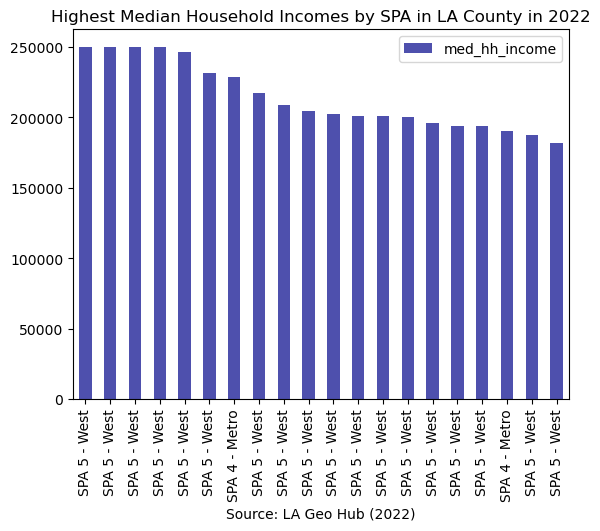

In [40]:
df_sorted.head(20).plot.bar(x='spa',
                             y='med_hh_income',
                             title='Highest Median Household Incomes by SPA in LA County in 2022',
                             color='#4E50AD',
                            xlabel='Source: LA Geo Hub (2022)')

### The highest paid census tracts in SPA 5 make well over $200k. This is over three times the national median income level. 

In [41]:
### Let's look at the lowest earning tracts in our dataset. 
df_sorted = df.sort_values(by='med_hh_income', ascending = True)

In [42]:
### Running it now that I've sorted. 
df_sorted [['med_hh_income', 'spa']].head(20)

med_hh_income            spa
52          4918.0  SPA 4 - Metro
51          7193.0  SPA 4 - Metro
50         11153.0  SPA 4 - Metro
57         11430.0  SPA 4 - Metro
60         12283.0  SPA 4 - Metro
49         12344.0  SPA 4 - Metro
429        15417.0   SPA 5 - West
191        16471.0  SPA 4 - Metro
430        16772.0   SPA 5 - West
64         17989.0  SPA 4 - Metro
428        20343.0   SPA 5 - West
95         22259.0  SPA 4 - Metro
85         22961.0  SPA 4 - Metro
282        26488.0  SPA 4 - Metro
145        27127.0  SPA 4 - Metro
299        27254.0  SPA 4 - Metro
87         28088.0  SPA 4 - Metro
88         28156.0  SPA 4 - Metro
46         28693.0  SPA 4 - Metro
86         29056.0  SPA 4 - Metro

### 85% of this chart contains SPA 4 census tracts. The highest earning census tract for this list makes below thirty thousand a year. If individuals within these census tracts have children, they could face greater financial barriers to purchasing nutritious food, partaking in pre-natal care, and and face lifelong disparities in health outcomes. 

<Axes: title={'center': 'Lowest Median Household Incomes by SPA in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

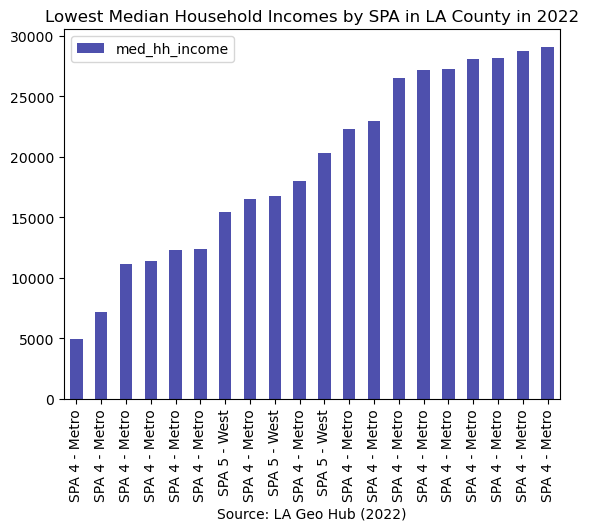

In [43]:
### Here is a chart to help visual the financial makeup of the lowest median household incomes by SPA. 
df_sorted.head(20).plot.bar(x='spa',
                             y='med_hh_income',
                             title='Lowest Median Household Incomes by SPA in LA County in 2022',
                             color='#4E50AD',
                            xlabel='Source: LA Geo Hub (2022)')

In [44]:
import folium

In [45]:
# I want to map LA County, but I need data from two different files. So I will be merging those first. This dataframe will be known as df2. 
df2=gpd.read_file('Census_Tracts_2020.geojson')
df2.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

In [46]:
# I will include the tract column for this now. CA = 06 and LA County = 037. 
df2['tract']='06' + '037' + df2 ['CT20']

In [47]:
df2.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry        tract  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

In [48]:
# I will now have to merge the data. df3 is the combination of my census tract file (df2) and my original SPAs.csv (df).
df3=df2.merge(df,on='tract')

In [49]:
# I need to run the head function to check whether that was successful.
df3.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0       392  181000  1810.00  4.454338e+07   37799.839553   
1       393  181300  1813.00  1.551066e+07   21437.949799   
2       394  181400  1814.00  9.463031e+06   14429.046463   
3       395  181500  1815.00  1.177897e+07   17895.198610   
4       396  181600  1816.00  1.345468e+07   17952.905094   

                                            geometry        tract  \
0  POLYGON ((-118.19820 34.15163, -118.19893 34.1...  06037181000   
1  POLYGON ((-118.21866 34.13912, -118.21873 34.1...  06037181300   
2  POLYGON ((-118.21519 34.13931, -118.21631 34.1...  06037181400   
3  POLYGON ((-118.19982 34.13961, -118.20098 34.1...  06037181500   
4  POLYGON ((-118.20208 34.13103, -118.20205 34.1...  06037181600   

   med_hh_income  med_hh_income_universe           ami_category  \
0       107708.0                    2315  Above Moderate Income   
1       115174.0                    1296  Above Moderate Income   
2        85409.0                    1674             Low Income   
3       114034.0                    1405  Above Moderate Income   
4        90571.0                    1079             Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0               No                     No                    No  District 1   
1               No                     No                    No  District 1   
2               No                     No                   Yes  District 1   
3               No                     No                    No  District 1   
4               No                     No                   Yes  District 1   

                        csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Eagle Rock  SPA 4 - Metro      4295  4.444900e+07   
1  Los Angeles - Eagle Rock  SPA 4 - Metro      4296  1.560564e+07   
2  Los Angeles - Eagle Rock  SPA 4 - Metro      4297  9.425720e+06   
3  Los Angeles - Eagle Rock  SPA 4 - Metro      4298  1.176077e+07   
4  Los Angeles - Eagle Rock  SPA 4 - Metro      4299  1.336064e+07   

   Shape__Length  
0    37014.56487  
1    19883.49368  
2    14270.34000  
3    17618.24516  
4    17197.12390

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

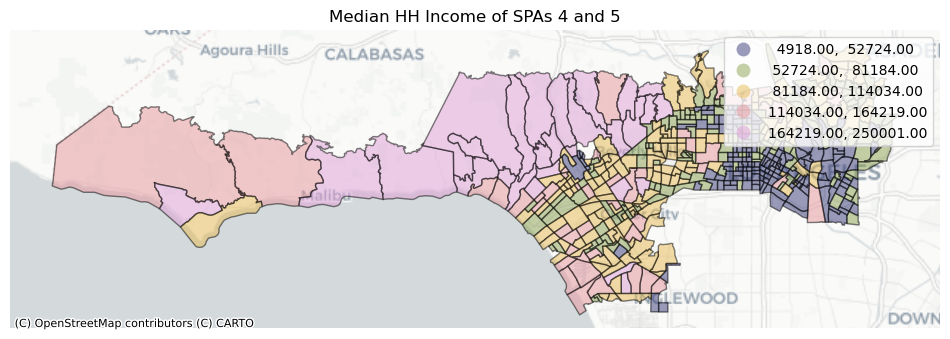

In [30]:
### Let's also run a map to see what this looks like. 
import matplotlib.pyplot as plt
import contextily as ctx

df3 = df3.to_crs(epsg=3857)

ax = df3.plot(figsize=(12, 10),
              column='med_hh_income',
              legend=True, 
              scheme='NaturalBreaks',
              cmap='tab20b',
              alpha=0.5,  
              edgecolor='k')


# ax.set_xlim(minx - 1000, maxx + 1000)
# ax.set_ylim(miny - 1000, maxy + 1000)

plt.title("Median HH Income of SPAs 4 and 5")
ax.set_axis_off()

# Add the basemap. 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.savefig('MedHHSpa4and5.png', bbox_inches='tight')  # Save the figure after showing it, and use bbox_inches='tight' to include everything in the output file

plt.show()

# Median HH Income Among the Highest Low Birth Weight Census Tracts and Lowest Low Birth Weight Census Tracts

### My groupmate, Savannah, created data files that contain the census tracts we will be looking at for the final. Using that, we will re-run some of the charts and figures that we've run previously.

In [51]:
### Let's do a deeper dive into our data using low birth weight data.
llbw=gpd.read_file('Low_LBW_Data.geojson')
hlbw=gpd.read_file('High_LBW_Data.geojson')

In [52]:
### Checking it worked. 
hlbw.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength Census Tract  \
0       452  189903  1899.03  9.037927e+05    4148.746180  06037189903   
1       459  190201  1902.01  2.441733e+06    6951.861667  06037190201   
2       582  206050  2060.50  1.921011e+07   25518.484734  06037206050   
3       553  201601  2016.01  5.816822e+06   11118.841894  06037201601   
4       928  264000  2640.00  2.010706e+07   22982.742080  06037264000   

     sup_dist           County Statistical Area            SPA  ESRI_OID  \
0  District 3           Los Angeles - Hollywood  SPA 4 - Metro      4583   
1  District 3           Los Angeles - Hollywood  SPA 4 - Metro      4590   
2  District 1  Los Angeles - Wholesale District  SPA 4 - Metro      2390   
3  District 1           Los Angeles - El Sereno  SPA 4 - Metro      2361   
4  District 3           Los Angeles - Brentwood   SPA 5 - West      3662   

    Shape__Area  Shape__Length   Longitude   Latitude  Low Birth Weight  \
0  9.110685e+05    4147.043296 -118.347712  34.102515             12.33   
1  2.414906e+06    6702.511792 -118.329714  34.103358             11.59   
2  1.918309e+07   25485.700200 -118.224453  34.029904             10.32   
3  5.989465e+06   10928.041970 -118.177462  34.072697             10.24   
4  2.011444e+07   22839.603650 -118.481502  34.054550             10.20   

   Low Birth Weight Pctl                                           geometry  
0                  99.95  POLYGON ((-118.34589 34.10369, -118.34624 34.1...  
1                  99.91  POLYGON ((-118.32751 34.10541, -118.32768 34.1...  
2                  99.70  POLYGON ((-118.22041 34.02978, -118.22035 34.0...  
3                  99.65  POLYGON ((-118.17759 34.07749, -118.17829 34.0...  
4                  99.64  POLYGON ((-118.47143 34.05772, -118.47138 34.0...

In [53]:
# Time to merge this on census tract, let's rename it to tract so we can add it to our income data!
columns = list(hlbw)
columns

['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'Census Tract',
 'sup_dist',
 'County Statistical Area',
 'SPA',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'Longitude',
 'Latitude',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'geometry']

In [54]:
### Renaming 
hlbw.columns = ['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'tract',
 'sup_dist',
 'County Statistical Area',
 'SPA',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'Longitude',
 'Latitude',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'geometry']

In [55]:
hlbw.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength        tract  \
0       452  189903  1899.03  9.037927e+05    4148.746180  06037189903   
1       459  190201  1902.01  2.441733e+06    6951.861667  06037190201   
2       582  206050  2060.50  1.921011e+07   25518.484734  06037206050   
3       553  201601  2016.01  5.816822e+06   11118.841894  06037201601   
4       928  264000  2640.00  2.010706e+07   22982.742080  06037264000   

     sup_dist           County Statistical Area            SPA  ESRI_OID  \
0  District 3           Los Angeles - Hollywood  SPA 4 - Metro      4583   
1  District 3           Los Angeles - Hollywood  SPA 4 - Metro      4590   
2  District 1  Los Angeles - Wholesale District  SPA 4 - Metro      2390   
3  District 1           Los Angeles - El Sereno  SPA 4 - Metro      2361   
4  District 3           Los Angeles - Brentwood   SPA 5 - West      3662   

    Shape__Area  Shape__Length   Longitude   Latitude  Low Birth Weight  \
0  9.110685e+05    4147.043296 -118.347712  34.102515             12.33   
1  2.414906e+06    6702.511792 -118.329714  34.103358             11.59   
2  1.918309e+07   25485.700200 -118.224453  34.029904             10.32   
3  5.989465e+06   10928.041970 -118.177462  34.072697             10.24   
4  2.011444e+07   22839.603650 -118.481502  34.054550             10.20   

   Low Birth Weight Pctl                                           geometry  
0                  99.95  POLYGON ((-118.34589 34.10369, -118.34624 34.1...  
1                  99.91  POLYGON ((-118.32751 34.10541, -118.32768 34.1...  
2                  99.70  POLYGON ((-118.22041 34.02978, -118.22035 34.0...  
3                  99.65  POLYGON ((-118.17759 34.07749, -118.17829 34.0...  
4                  99.64  POLYGON ((-118.47143 34.05772, -118.47138 34.0...

In [56]:
### Let's merge this with our income data!
highestlbw=hlbw.merge(df,on='tract')

In [57]:
### Confirming if that worked. 
highestlbw.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength        tract  \
0       452  189903  1899.03  9.037927e+05    4148.746180  06037189903   
1       459  190201  1902.01  2.441733e+06    6951.861667  06037190201   
2       582  206050  2060.50  1.921011e+07   25518.484734  06037206050   
3       553  201601  2016.01  5.816822e+06   11118.841894  06037201601   
4       928  264000  2640.00  2.010706e+07   22982.742080  06037264000   

   sup_dist_x           County Statistical Area            SPA  ESRI_OID_x  \
0  District 3           Los Angeles - Hollywood  SPA 4 - Metro        4583   
1  District 3           Los Angeles - Hollywood  SPA 4 - Metro        4590   
2  District 1  Los Angeles - Wholesale District  SPA 4 - Metro        2390   
3  District 1           Los Angeles - El Sereno  SPA 4 - Metro        2361   
4  District 3           Los Angeles - Brentwood   SPA 5 - West        3662   

   ...           ami_category  below_med_income  below_60pct_med_income  \
0  ...             Low Income                No                      No   
1  ...   Extremely Low Income               Yes                     Yes   
2  ...        Very Low Income               Yes                     Yes   
3  ...        Very Low Income               Yes                     Yes   
4  ...  Above Moderate Income                No                      No   

   below_moderate_income  sup_dist_y                               csa  \
0                    Yes  District 3           Los Angeles - Hollywood   
1                    Yes  District 3           Los Angeles - Hollywood   
2                    Yes  District 1  Los Angeles - Wholesale District   
3                    Yes  District 1           Los Angeles - El Sereno   
4                     No  District 3           Los Angeles - Brentwood   

             spa  ESRI_OID_y  Shape__Area_y Shape__Length_y  
0  SPA 4 - Metro        4583   9.110685e+05     4147.043296  
1  SPA 4 - Metro        4590   2.414906e+06     6702.511792  
2  SPA 4 - Metro        2390   1.918309e+07    25485.700200  
3  SPA 4 - Metro        2361   5.989465e+06    10928.041970  
4   SPA 5 - West        3662   2.011444e+07    22839.603650  

[5 rows x 29 columns]

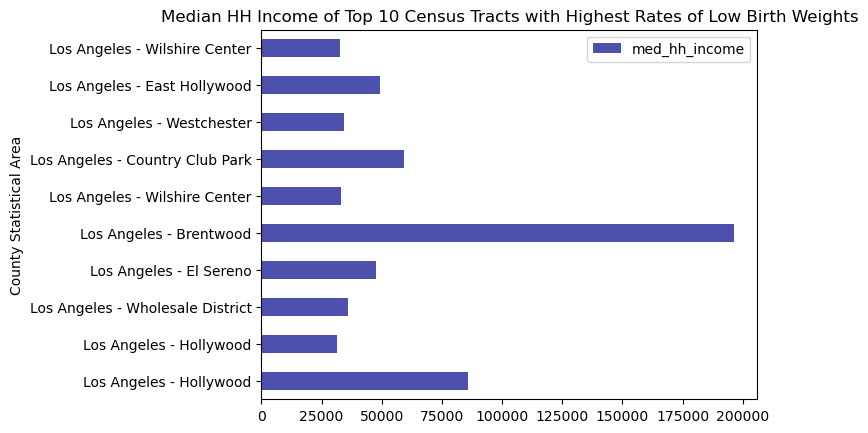

In [59]:
import matplotlib.pyplot as plt

highestlbw.head(10).plot.barh(x='County Statistical Area',
                              y='med_hh_income', 
                              title='Median HH Income of Top 10 Census Tracts with Highest Rates of Low Birth Weights',
                              color='#4E50AD')


plt.savefig('median_hh_income_charHLBWt.png', bbox_inches='tight')


<Axes: title={'center': 'Median HH Income of Top 10 Census Tracts with Highest Proportion of Low Birth Weights'}, xlabel='med_hh_income', ylabel='County Statistical Area'>

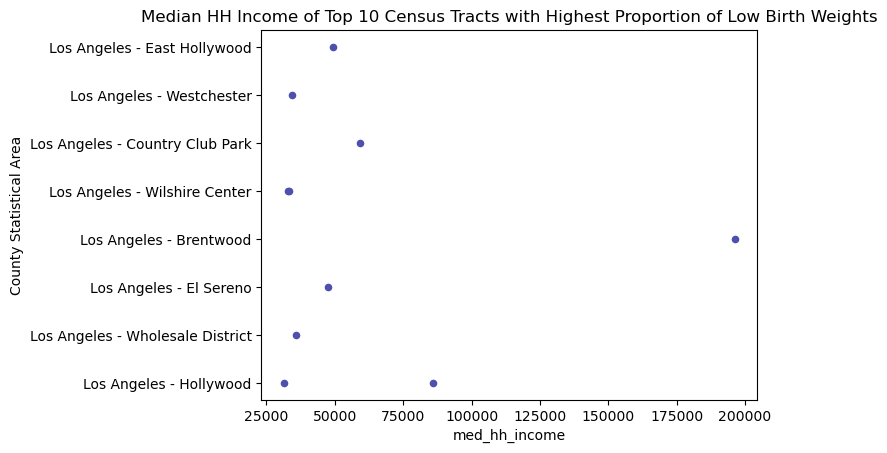

In [66]:
highestlbw.plot.scatter(x='med_hh_income', y="County Statistical Area", title='Median HH Income of Top 10 Census Tracts with Highest Proportion of Low Birth Weights', color='#4E50AD')

### Upon review of these charts, the only census tract that is somewhat surprising to see is Brentwood. This could be due to the mother's age while pregnant, or this census tract is located near the UCLA Hospital (which accepts various forms of insurance). Regardless, this census tract is making signifncatly more income than the other census tracts. It would be useful to map this out to get a better visual.

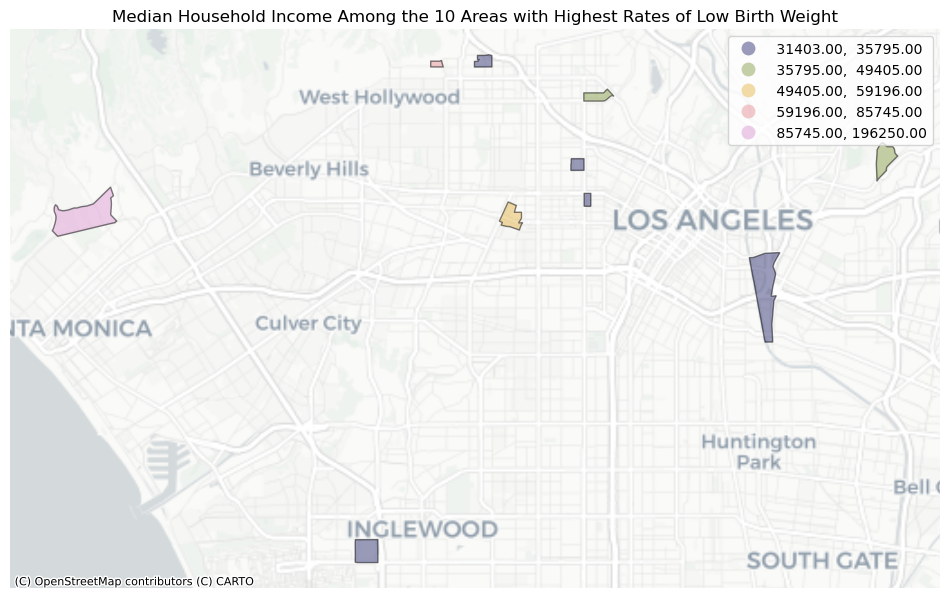

In [60]:
### Let's also run a map to see what this looks like. 
import matplotlib.pyplot as plt
import contextily as ctx

highestlbw = highestlbw.to_crs(epsg=3857)

ax = highestlbw.plot(figsize=(12, 10),
              column='med_hh_income',
              legend=True, 
              scheme='NaturalBreaks',
              cmap='tab20b',
              alpha=0.5,  
              edgecolor='k')


# ax.set_xlim(minx - 1000, maxx + 1000)
# ax.set_ylim(miny - 1000, maxy + 1000)

plt.title("Median Household Income Among the 10 Areas with Highest Rates of Low Birth Weight")
ax.set_axis_off()

# Add the basemap. 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.savefig('MedHHHLBWSPAS.png', bbox_inches='tight')  # Save the figure after showing it, and use bbox_inches='tight' to include everything in the output file

plt.show()

In [61]:
### Let's run this with the lowest levels of low birth weight as well. 
llbw=gpd.read_file('Low_LBW_Data.geojson')

In [62]:
llbw.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength Census Tract  \
0       491  191902  1919.02  7.817628e+06   11569.812031  06037191902   
1       506  194401  1944.01  5.013242e+06    9747.518611  06037194401   
2       490  191901  1919.01  8.322073e+06   11883.439440  06037191901   
3       614  208501  2085.01  2.617928e+06    6561.569834  06037208501   
4       443  189400  1894.00  1.557287e+07   29227.415756  06037189400   

     sup_dist              County Statistical Area            SPA  ESRI_OID  \
0  District 3                Los Angeles - Melrose  SPA 4 - Metro      4622   
1  District 3                Los Angeles - Melrose  SPA 4 - Metro      4723   
2  District 3                Los Angeles - Melrose  SPA 4 - Metro      4621   
3  District 1  Los Angeles - Historic Filipinotown  SPA 4 - Metro      2508   
4  District 5        Los Angeles - Hollywood Hills  SPA 4 - Metro      4474   

    Shape__Area  Shape__Length   Longitude   Latitude  Low Birth Weight  \
0  7.818741e+06   11569.207750 -118.338822  34.083773              1.41   
1  5.154788e+06    9246.950612 -118.364224  34.084310              1.92   
2  8.323635e+06   11867.319170 -118.338361  34.090683              2.05   
3  2.614755e+06    6561.528141 -118.271946  34.069532              2.10   
4  1.550761e+07   23706.436600 -118.321143  34.120081              2.17   

   Low Birth Weight Pctl                                           geometry  
0                   0.54  POLYGON ((-118.34161 34.08709, -118.34279 34.0...  
1                   1.68  POLYGON ((-118.36328 34.08898, -118.36380 34.0...  
2                   2.22  POLYGON ((-118.34047 34.09438, -118.34099 34.0...  
3                   2.35  POLYGON ((-118.27009 34.06703, -118.27003 34.0...  
4                   2.75  POLYGON ((-118.32033 34.13137, -118.32034 34.1...

In [63]:
columns = list(llbw)
columns

['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'Census Tract',
 'sup_dist',
 'County Statistical Area',
 'SPA',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'Longitude',
 'Latitude',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'geometry']

In [64]:
### Renaming the Census Tracts to just tract again!
llbw.columns = ['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'tract',
 'sup_dist',
 'County Statistical Area',
 'SPA',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'Longitude',
 'Latitude',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'geometry']

In [65]:
### Let's check that this worked!
llbw.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength        tract  \
0       491  191902  1919.02  7.817628e+06   11569.812031  06037191902   
1       506  194401  1944.01  5.013242e+06    9747.518611  06037194401   
2       490  191901  1919.01  8.322073e+06   11883.439440  06037191901   
3       614  208501  2085.01  2.617928e+06    6561.569834  06037208501   
4       443  189400  1894.00  1.557287e+07   29227.415756  06037189400   

     sup_dist              County Statistical Area            SPA  ESRI_OID  \
0  District 3                Los Angeles - Melrose  SPA 4 - Metro      4622   
1  District 3                Los Angeles - Melrose  SPA 4 - Metro      4723   
2  District 3                Los Angeles - Melrose  SPA 4 - Metro      4621   
3  District 1  Los Angeles - Historic Filipinotown  SPA 4 - Metro      2508   
4  District 5        Los Angeles - Hollywood Hills  SPA 4 - Metro      4474   

    Shape__Area  Shape__Length   Longitude   Latitude  Low Birth Weight  \
0  7.818741e+06   11569.207750 -118.338822  34.083773              1.41   
1  5.154788e+06    9246.950612 -118.364224  34.084310              1.92   
2  8.323635e+06   11867.319170 -118.338361  34.090683              2.05   
3  2.614755e+06    6561.528141 -118.271946  34.069532              2.10   
4  1.550761e+07   23706.436600 -118.321143  34.120081              2.17   

   Low Birth Weight Pctl                                           geometry  
0                   0.54  POLYGON ((-118.34161 34.08709, -118.34279 34.0...  
1                   1.68  POLYGON ((-118.36328 34.08898, -118.36380 34.0...  
2                   2.22  POLYGON ((-118.34047 34.09438, -118.34099 34.0...  
3                   2.35  POLYGON ((-118.27009 34.06703, -118.27003 34.0...  
4                   2.75  POLYGON ((-118.32033 34.13137, -118.32034 34.1...

In [66]:
### Merging this with our income data as well. 
lowestlbw=llbw.merge(df,on='tract')

In [67]:
### Confirming if that worked. 
lowestlbw.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength        tract  \
0       491  191902  1919.02  7.817628e+06   11569.812031  06037191902   
1       506  194401  1944.01  5.013242e+06    9747.518611  06037194401   
2       490  191901  1919.01  8.322073e+06   11883.439440  06037191901   
3       614  208501  2085.01  2.617928e+06    6561.569834  06037208501   
4       443  189400  1894.00  1.557287e+07   29227.415756  06037189400   

   sup_dist_x              County Statistical Area            SPA  ESRI_OID_x  \
0  District 3                Los Angeles - Melrose  SPA 4 - Metro        4622   
1  District 3                Los Angeles - Melrose  SPA 4 - Metro        4723   
2  District 3                Los Angeles - Melrose  SPA 4 - Metro        4621   
3  District 1  Los Angeles - Historic Filipinotown  SPA 4 - Metro        2508   
4  District 5        Los Angeles - Hollywood Hills  SPA 4 - Metro        4474   

   ...           ami_category  below_med_income  below_60pct_med_income  \
0  ...             Low Income                No                      No   
1  ...             Low Income                No                      No   
2  ...        Very Low Income               Yes                      No   
3  ...             Low Income               Yes                      No   
4  ...  Above Moderate Income                No                      No   

   below_moderate_income  sup_dist_y                                  csa  \
0                    Yes  District 3                Los Angeles - Melrose   
1                    Yes  District 3                Los Angeles - Melrose   
2                    Yes  District 3                Los Angeles - Melrose   
3                    Yes  District 1  Los Angeles - Historic Filipinotown   
4                     No  District 5        Los Angeles - Hollywood Hills   

             spa  ESRI_OID_y  Shape__Area_y Shape__Length_y  
0  SPA 4 - Metro        4622   7.818741e+06    11569.207750  
1  SPA 4 - Metro        4723   5.154788e+06     9246.950612  
2  SPA 4 - Metro        4621   8.323635e+06    11867.319170  
3  SPA 4 - Metro        2508   2.614755e+06     6561.528141  
4  SPA 4 - Metro        4474   1.550761e+07    23706.436600  

[5 rows x 29 columns]

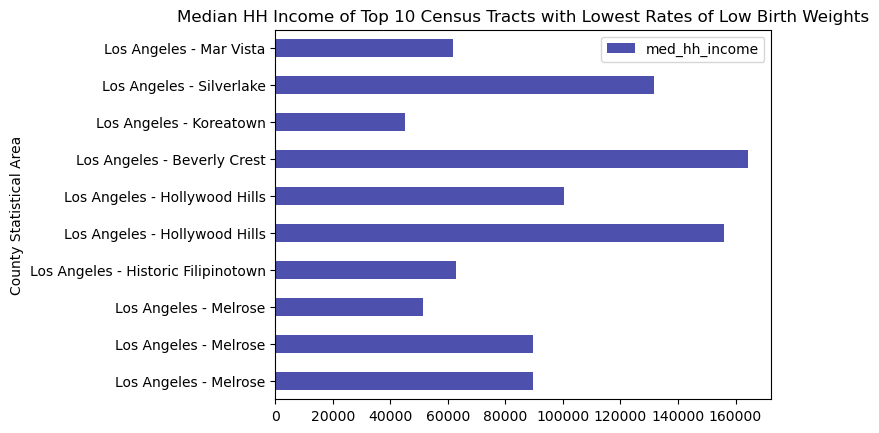

In [68]:
import matplotlib.pyplot as plt

lowestlbw.head(10).plot.barh(x='County Statistical Area',
                            y='med_hh_income', 
                            title='Median HH Income of Top 10 Census Tracts with Lowest Rates of Low Birth Weights',
                            color='#4E50AD')

plt.savefig('median_hh_income_charLLBWt.png', bbox_inches='tight')

<Axes: title={'center': 'Median HH Income of Top 10 Census Tracts with Lowest Proportion of Low Birth Weights'}, xlabel='med_hh_income', ylabel='County Statistical Area'>

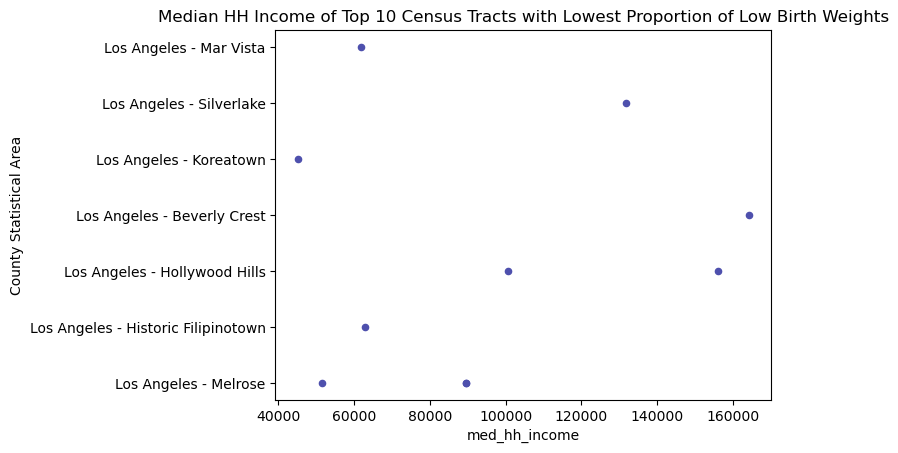

In [40]:
lowestlbw.plot.scatter(x='med_hh_income', y="County Statistical Area", title='Median HH Income of Top 10 Census Tracts with Lowest Proportion of Low Birth Weights', color='#4E50AD')

### The bar chart is more evenly distributed than the chart that contained the highest rates of lbw. Additionally, we can see that across the board, these particular census tracts are making more money than the highest lbw census tracts. In turn, those living here likely have more disposable income for many of the things that I described above. Below we'll see the geographic spread of these locations.

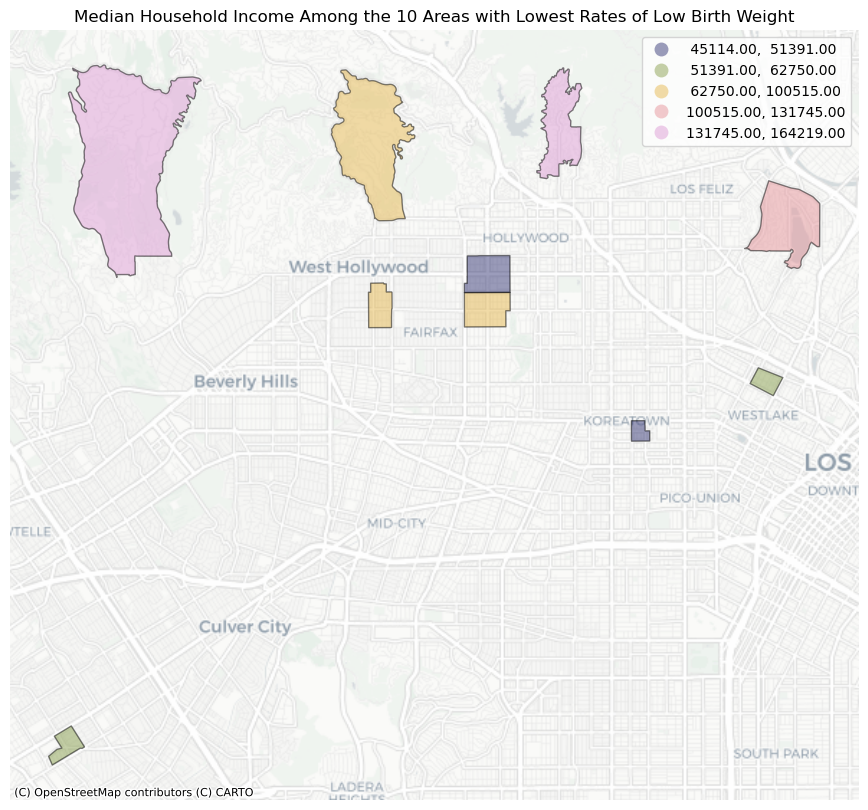

In [69]:
### Running this map to provide a better visual as to where these census tracts are located. 
import matplotlib.pyplot as plt
import contextily as ctx

lowestlbw = lowestlbw.to_crs(epsg=3857)

ax = lowestlbw.plot(figsize=(12, 10),
              column='med_hh_income',
              legend=True, 
              scheme='NaturalBreaks',
              cmap='tab20b',
              alpha=0.5,  
              edgecolor='k')


# ax.set_xlim(minx - 1000, maxx + 1000)
# ax.set_ylim(miny - 1000, maxy + 1000)

plt.title("Median Household Income Among the 10 Areas with Lowest Rates of Low Birth Weight")
ax.set_axis_off()

# Add the basemap. 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.savefig('MedHHLLBWSPAS.png', bbox_inches='tight')  # Save the figure after showing it, and use bbox_inches='tight' to include everything in the output file

plt.show()

In [42]:
### Here are some descriptive statistics of both datasets. 
highestlbw['med_hh_income'].describe()

count        10.000000
mean      60557.400000
std       50569.323497
min       31403.000000
25%       33514.750000
50%       41630.000000
75%       56748.250000
max      196250.000000
Name: med_hh_income, dtype: float64

In [43]:
lowestlbw['med_hh_income'].describe()

count        10.000000
mean      95292.100000
std       42821.563388
min       45114.000000
25%       62027.000000
50%       89620.000000
75%      123937.500000
max      164219.000000
Name: med_hh_income, dtype: float64

### Much like what I described previously, the census tracts of those with the lowest levels of low birth weight are making two times the amount of those with the highest percentages. 

# Race and Ethnicity in SPA 4 and 5

### What is the demographic breakdown of SPA 4 and SPA 5? Bringing in some data to explore this question. 

In [75]:
rf = pd.read_csv('R13280610_SL140.csv')

In [46]:
### Reading in the shape of this file. 
rf.shape

(2498, 50)

In [47]:
### Also running the head command as we'll need to change variable names. 
rf.head()

tract              Geo_NAME  \
0  6037101110  Census Tract 1011.10   
1  6037101122  Census Tract 1011.22   
2  6037101220  Census Tract 1012.20   
3  6037101221  Census Tract 1012.21   
4  6037101222  Census Tract 1012.22   

                                           Geo_QNAME  Geo_NATION  Geo_STATE  \
0  Census Tract 1011.10, Los Angeles County, Cali...           0          6   
1  Census Tract 1011.22, Los Angeles County, Cali...           0          6   
2  Census Tract 1012.20, Los Angeles County, Cali...           0          6   
3  Census Tract 1012.21, Los Angeles County, Cali...           0          6   
4  Census Tract 1012.22, Los Angeles County, Cali...           0          6   

   Geo_COUNTY  Geo_CS  Geo_CT  Geo_PLACE  Geo_CSA  ...  SE_T017_020  \
0          37     NaN  101110        NaN      NaN  ...     4.121750   
1          37     NaN  101122        NaN      NaN  ...     1.746725   
2          37     NaN  101220        NaN      NaN  ...    -0.564972   
3          37     NaN  101221        NaN      NaN  ...     0.291206   
4          37     NaN  101222        NaN      NaN  ...     9.859155   

   SE_T017_002  SE_T017_004  SE_T017_006  SE_T017_008  SE_T017_010  \
0     4.050484     6.927711   -12.162162   -50.000000   -10.699588   
1     3.140175     7.263028    19.230769    75.000000   -20.808081   
2     8.225729     5.354994    -5.555556   -63.636364    29.411765   
3     0.132567     5.444126   -17.977528   -25.000000    -5.747126   
4    17.241379    27.074236   -19.148936    50.000000   -20.855615   

   SE_T017_012  SE_T017_014  SE_T017_016  SE_T017_018  
0        100.0   -53.333333    23.776224     4.305136  
1       -100.0   130.000000     2.586207    -5.739130  
2       -100.0   600.000000    -3.809524   -15.015723  
3          0.0   100.000000   -41.666667     0.597780  
4          NaN          NaN    -2.500000    -0.763359  

[5 rows x 50 columns]

In [76]:
### Adding in the leading zero for GEO_FIPS data.

rf = pd.read_csv(
    'R13280610_SL140.csv',
    dtype=
    {
        'tract':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [77]:
### I am also dropping out a few of the columns that are unneccessary to slim down the file a bit. 
rf.columns[rf.isna().all()].tolist()

['Geo_CS', 'Geo_PLACE', 'Geo_CSA']

In [78]:
### As a self reminder, axis = 0 drops the rows. Axis = 1 drops columns with the null.
rf = rf.dropna(axis=1,how="all")

In [79]:
### Re-running the head command to make sure that this worked properly.
rf.head()

tract              Geo_NAME  \
0  06037101110  Census Tract 1011.10   
1  06037101122  Census Tract 1011.22   
2  06037101220  Census Tract 1012.20   
3  06037101221  Census Tract 1012.21   
4  06037101222  Census Tract 1012.22   

                                           Geo_QNAME  Geo_NATION Geo_STATE  \
0  Census Tract 1011.10, Los Angeles County, Cali...           0        06   
1  Census Tract 1011.22, Los Angeles County, Cali...           0        06   
2  Census Tract 1012.20, Los Angeles County, Cali...           0        06   
3  Census Tract 1012.21, Los Angeles County, Cali...           0        06   
4  Census Tract 1012.22, Los Angeles County, Cali...           0        06   

  Geo_COUNTY  Geo_CT  SE_T004_019  SE_T004_001  SE_T004_003  ...  SE_T017_020  \
0        037  101110         4926         3545         2840  ...     4.121750   
1        037  101122         3728         3186         2614  ...     1.746725   
2        037  101220         3344         2263         1751  ...    -0.564972   
3        037  101221         3444         2266         1840  ...     0.291206   
4        037  101222         2808         1768         1455  ...     9.859155   

   SE_T017_002  SE_T017_004  SE_T017_006  SE_T017_008  SE_T017_010  \
0     4.050484     6.927711   -12.162162   -50.000000   -10.699588   
1     3.140175     7.263028    19.230769    75.000000   -20.808081   
2     8.225729     5.354994    -5.555556   -63.636364    29.411765   
3     0.132567     5.444126   -17.977528   -25.000000    -5.747126   
4    17.241379    27.074236   -19.148936    50.000000   -20.855615   

   SE_T017_012  SE_T017_014  SE_T017_016  SE_T017_018  
0        100.0   -53.333333    23.776224     4.305136  
1       -100.0   130.000000     2.586207    -5.739130  
2       -100.0   600.000000    -3.809524   -15.015723  
3          0.0   100.000000   -41.666667     0.597780  
4          NaN          NaN    -2.500000    -0.763359  

[5 rows x 47 columns]

In [80]:
### Renaming variables so I can merge with our lbw data. 
columns_to_keep = ['tract',
                   'SE_T004_019',
                   'SE_T004_001',
                   'SE_T004_003',
                   'SE_T004_005',
                   'SE_T004_007',
                   'SE_T004_009',
                   'SE_T004_011',
                   'SE_T004_013',
                   'SE_T004_015',
                   'SE_T004_017']
### The new dataframe will be called rf2.
rf2 = rf[columns_to_keep]

In [81]:
### Viewing the column list to understand whether it worked.  
columns = list(rf2)
columns

['tract',
 'SE_T004_019',
 'SE_T004_001',
 'SE_T004_003',
 'SE_T004_005',
 'SE_T004_007',
 'SE_T004_009',
 'SE_T004_011',
 'SE_T004_013',
 'SE_T004_015',
 'SE_T004_017']

In [82]:
### Renaming the variables to understand the description quickly. I will keep 'tract' as is since that is what I have been using for other files.
rf2.columns = ['tract',
'TotalPop',
'Non Hispanic',
'Non Hispanic White Alone',
'Non Hispanic Black Alone',
'Non Hispanic American Indian and Alaska Native Alone',
'Non Hispanic Asian Alone',
'Non Hispanic Native Hawaiian and Pacific Islander Alone',
'Non Hispanic Other Alone',
'Non Hispanic Multi Race',
'Hispanic']

In [83]:
### Double checking that it's been updated accordingly. 
rf2.head()

tract  TotalPop  Non Hispanic  Non Hispanic White Alone  \
0  06037101110      4926          3545                      2840   
1  06037101122      3728          3186                      2614   
2  06037101220      3344          2263                      1751   
3  06037101221      3444          2266                      1840   
4  06037101222      2808          1768                      1455   

   Non Hispanic Black Alone  \
0                        65   
1                        31   
2                        34   
3                        73   
4                        76   

   Non Hispanic American Indian and Alaska Native Alone  \
0                                                  7      
1                                                  7      
2                                                  4      
3                                                  3      
4                                                  3      

   Non Hispanic Asian Alone  \
0                       434   
1                       392   
2                       352   
3                       246   
4                       148   

   Non Hispanic Native Hawaiian and Pacific Islander Alone  \
0                                                  8         
1                                                  0         
2                                                  0         
3                                                  3         
4                                                  0         

   Non Hispanic Other Alone  Non Hispanic Multi Race  Hispanic  
0                        14                      177      1381  
1                        23                      119       542  
2                        21                      101      1081  
3                        10                       91      1178  
4                         8                       78      1040

In [84]:
# Okay, now I need to merge this to my other datafile as it has the SPAs listed. Introuducing it now so I can merge the two in a few cells. 
sf = pd.read_csv('spas4and5.csv')

In [85]:
sf.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  6037199700        38892.0                    1204  Very Low Income   
1  6037199801        41027.0                     903  Very Low Income   
2  6037199802        42500.0                     612  Very Low Income   
3  6037199900        37232.0                     845  Very Low Income   
4  6037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro      2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro      2351  1.099246e+07   

   Shape__Length  
0   13808.463240  
1    9459.391827  
2    8868.744225  
3   10141.728020  
4   15893.383640

In [86]:
# Adding in the leading zero. 
sf = pd.read_csv(
    'spas4and5.csv',
    dtype=
    {
        'tract':str
    
    }
)

In [87]:
sf.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199801        41027.0                     903  Very Low Income   
2  06037199802        42500.0                     612  Very Low Income   
3  06037199900        37232.0                     845  Very Low Income   
4  06037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro      2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro      2351  1.099246e+07   

   Shape__Length  
0   13808.463240  
1    9459.391827  
2    8868.744225  
3   10141.728020  
4   15893.383640

In [88]:
# Okay, both of them have been loaded in. Let's merge the two on the variable listed tract. 
race=sf.merge(rf2,on='tract')

In [89]:
race.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199801        41027.0                     903  Very Low Income   
2  06037199802        42500.0                     612  Very Low Income   
3  06037199900        37232.0                     845  Very Low Income   
4  06037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ...  TotalPop  \
0  Los Angeles - Wholesale District  SPA 4 - Metro  ...      3393   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro  ...      3036   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro  ...      2144   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro  ...      2641   
4           Los Angeles - El Sereno  SPA 4 - Metro  ...      2332   

   Non Hispanic  Non Hispanic White Alone  Non Hispanic Black Alone  \
0          1200                       519                        95   
1          1090                        92                        38   
2           972                        53                         7   
3           616                        76                        57   
4           595                       258                        54   

   Non Hispanic American Indian and Alaska Native Alone  \
0                                                  7      
1                                                  2      
2                                                  8      
3                                                  0      
4                                                  2      

   Non Hispanic Asian Alone  \
0                       479   
1                       929   
2                       859   
3                       447   
4                       250   

   Non Hispanic Native Hawaiian and Pacific Islander Alone  \
0                                                  4         
1                                                  0         
2                                                  0         
3                                                  4         
4                                                  1         

   Non Hispanic Other Alone  Non Hispanic Multi Race  Hispanic  
0                        28                       68      2193  
1                         5                       24      1946  
2                         4                       41      1172  
3                        13                       19      2025  
4                         3                       27      1737  

[5 rows x 23 columns]

In [90]:
import geopandas as gpd

In [91]:
# Reading in a GEOJson file. 
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

In [92]:
# Subsetting data. 
tracts = tracts[['CT20','geometry']]
tracts.head()

CT20                                           geometry
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

In [93]:
### Adding in a FIPS column. 
tracts['tract'] ='06' + '037' + tracts['CT20']

In [94]:
### That should have worked, let's see. 
tracts.head()

CT20                                           geometry        tract
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

In [95]:
### Merging once more.
tracts_race=tracts.merge(race,on="tract")

In [96]:
### Checking again. 
tracts_race.head()

CT20                                           geometry        tract  \
0  181000  POLYGON ((-118.19820 34.15163, -118.19893 34.1...  06037181000   
1  181300  POLYGON ((-118.21866 34.13912, -118.21873 34.1...  06037181300   
2  181400  POLYGON ((-118.21519 34.13931, -118.21631 34.1...  06037181400   
3  181500  POLYGON ((-118.19982 34.13961, -118.20098 34.1...  06037181500   
4  181600  POLYGON ((-118.20208 34.13103, -118.20205 34.1...  06037181600   

   med_hh_income  med_hh_income_universe           ami_category  \
0       107708.0                    2315  Above Moderate Income   
1       115174.0                    1296  Above Moderate Income   
2        85409.0                    1674             Low Income   
3       114034.0                    1405  Above Moderate Income   
4        90571.0                    1079             Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0               No                     No                    No  District 1   
1               No                     No                    No  District 1   
2               No                     No                   Yes  District 1   
3               No                     No                    No  District 1   
4               No                     No                   Yes  District 1   

   ... TotalPop Non Hispanic  Non Hispanic White Alone  \
0  ...     6132         4491                      2552   
1  ...     3613         2506                      1252   
2  ...     4134         2761                      1291   
3  ...     3653         2280                      1324   
4  ...     4247         2937                      1645   

   Non Hispanic Black Alone  \
0                        91   
1                        65   
2                        79   
3                        52   
4                       124   

   Non Hispanic American Indian and Alaska Native Alone  \
0                                                 15      
1                                                  7      
2                                                 13      
3                                                  5      
4                                                 11      

   Non Hispanic Asian Alone  \
0                      1465   
1                       982   
2                      1172   
3                       701   
4                       865   

   Non Hispanic Native Hawaiian and Pacific Islander Alone  \
0                                                  5         
1                                                  4         
2                                                  3         
3                                                  3         
4                                                 15         

   Non Hispanic Other Alone  Non Hispanic Multi Race  Hispanic  
0                        46                      317      1641  
1                        13                      183      1107  
2                        24                      179      1373  
3                        21                      174      1373  
4                        23                      254      1310  

[5 rows x 25 columns]

### Running some equations from our lab discussion that will be utilized to understand the racial/ethnic breakdown of these two SPAs. 

In [97]:
tracts_race['PCT_Black'] = tracts_race['Non Hispanic Black Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_White'] = tracts_race['Non Hispanic White Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_Asian'] = tracts_race['Non Hispanic Asian Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_Hispanic'] = tracts_race['Hispanic']/tracts_race['TotalPop']*100

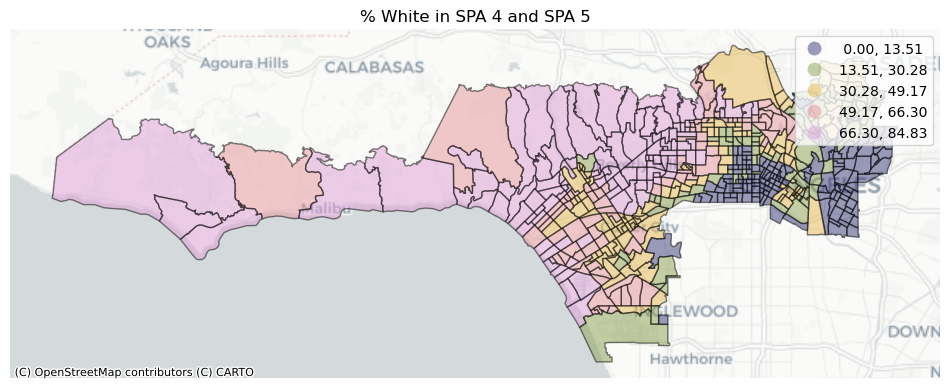

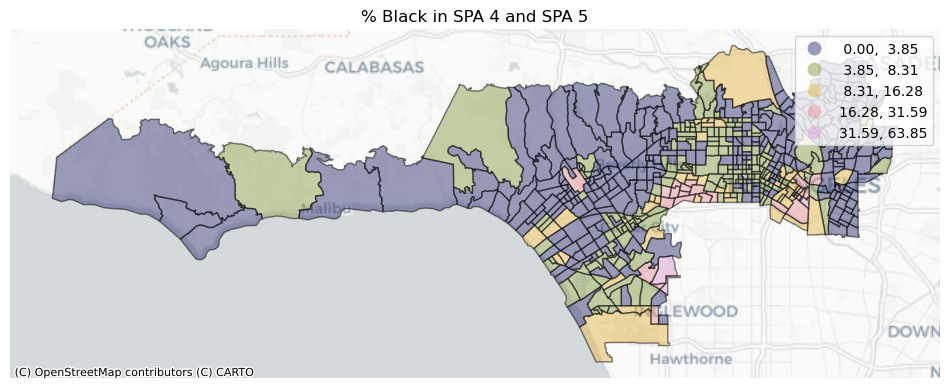

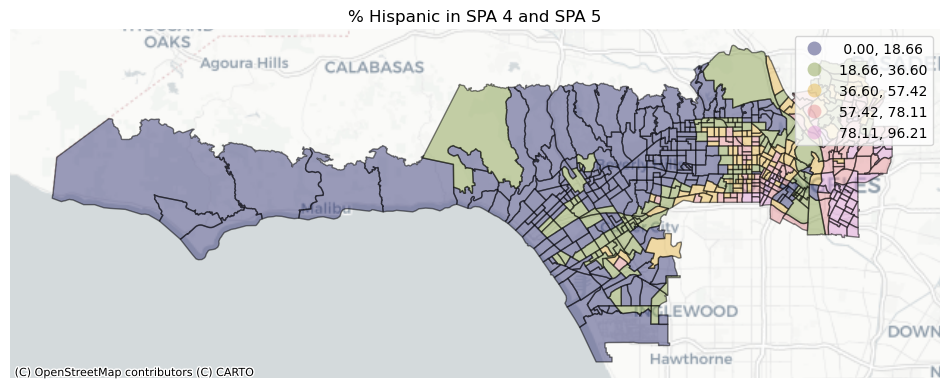

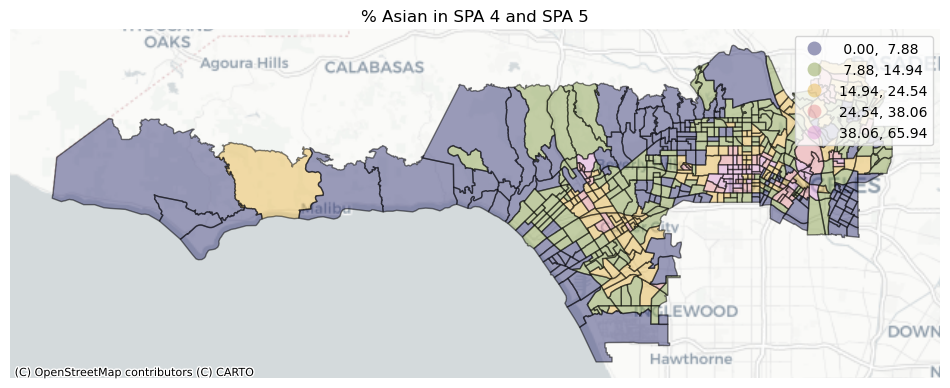

In [46]:
import matplotlib.pyplot as plt
import contextily as ctx


tracts_race = tracts_race.to_crs(epsg=3857)

def plot_demographic_distribution(tracts_data, demographics):
    """
    Plots the demographic distribution maps for specified demographics.

    Parameters:
    - tracts_data: GeoDataFrame with tract data and demographics
    - demographics: List of demographic columns to plot
    """
    for demographic in demographics:
        # Set up the plot
        ax = tracts_data.plot(figsize=(12, 10),
                              column=demographic,
                              legend=True, 
                              scheme='NaturalBreaks',
                              cmap='tab20b',
                              alpha=0.5,  
                              edgecolor='k')

        ### Title and turning off axis
        plt.title(f"% {demographic.split('_')[-1]} in SPA 4 and SPA 5")
        ax.set_axis_off()

        ### Adding the basemap
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

        ### Save the figure
        plt.savefig(f'%{demographic.split("_")[-1]}4and5', bbox_inches='tight')

        ### Display the plot
        plt.show()

### List of demographic categories to plot
demographics = ['PCT_White', 'PCT_Black', 'PCT_Hispanic', 'PCT_Asian']

### Call the function with the data and demographics list
plot_demographic_distribution(tracts_race, demographics)


### White inidividuals are dispersed throughout the two SPAs, but are especially concentrated in SPA 5. Based off our discussions with Chris, I will run one last race/ethnicity map using only non-White individuals. Calculating the percentage for that below. 

In [98]:
tracts_race['PCT_Non_White'] = 100 - tracts_race['PCT_White']
tracts_race['Total_Non_White'] = tracts_race['TotalPop'] * tracts_race['PCT_Non_White'] / 100
print(f"Total number of non-white people in LA County: {tracts_race['Total_Non_White']}")

Total number of non-white people in LA County: 0      3580.0
1      2361.0
2      2843.0
3      2329.0
4      2602.0
        ...  
532     103.0
533     667.0
534      48.0
535       9.0
536       4.0
Name: Total_Non_White, Length: 537, dtype: float64


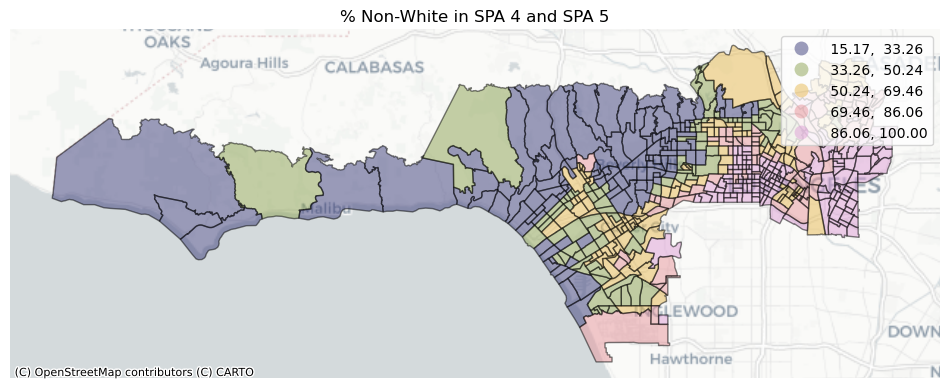

In [48]:
import matplotlib.pyplot as plt
import contextily as ctx

tracts_race = tracts_race.to_crs(epsg=3857)

ax = tracts_race.plot(figsize=(12, 10),
              column='PCT_Non_White',
              legend=True, 
              scheme='NaturalBreaks',
              cmap='tab20b',
              alpha=0.5,  
              edgecolor='k')


# ax.set_xlim(minx - 1000, maxx + 1000)
# ax.set_ylim(miny - 1000, maxy + 1000)

plt.title("% Non-White in SPA 4 and SPA 5")
ax.set_axis_off()

# Add the basemap. 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.savefig('%NonWhiteSPA4and5', bbox_inches='tight')  # Save the figure after showing it, and use bbox_inches='tight' to include everything in the output file

plt.show()

### There are some pockets of SPA 5 that are populated by non-white folks but the chart shows that many live in SPA 4, especially as we look to the right of the map. 

In [99]:
# END OF NOTEBOOK 